# Simple Statistics

## Import Data

In [60]:
# Imports 
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Import the csv files that are in the csv folder and save them into dataframes
damallsvenskan2018_df = pd.read_csv('csv/damallsvenskan2018.csv')
damallsvenskan2019_df = pd.read_csv('csv/damallsvenskan2019.csv')
damallsvenskan2020_df = pd.read_csv('csv/damallsvenskan2020.csv')
damallsvenskan2021_df = pd.read_csv('csv/damallsvenskan2021.csv')
damallsvenskan2022_df = pd.read_csv('csv/damallsvenskan2022.csv')
damallsvenskan_all_df = pd.read_csv('csv/damallsvenskan_all.csv')

allsvenskan2018_df = pd.read_csv('csv/allsvenskan2018.csv')
allsvenskan2019_df = pd.read_csv('csv/allsvenskan2019.csv')
allsvenskan2020_df = pd.read_csv('csv/allsvenskan2020.csv')
allsvenskan2021_df = pd.read_csv('csv/allsvenskan2021.csv')
allsvenskan2022_df = pd.read_csv('csv/allsvenskan2022.csv')
allsvenskan_all_df = pd.read_csv('csv/allsvenskan_all.csv')

## Simple Statistics

### Amount of passes

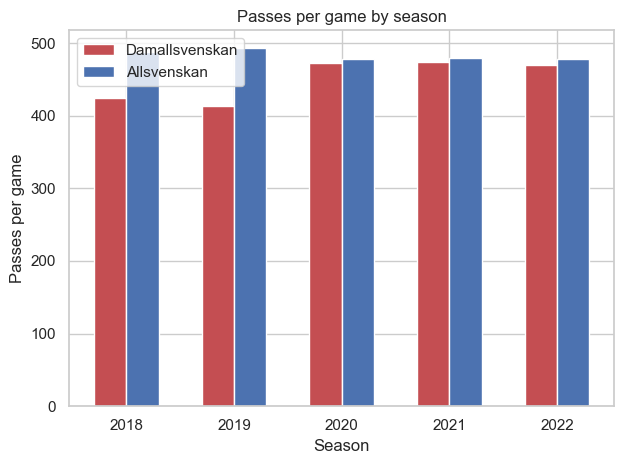

In [62]:
# Count the number of passes in total for all teams for each season
pass_count_damallsvenskan2018 =  damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2018 = allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2019 =  damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2019 = allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2020 =  damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2020 = allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2021 =  damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2021 = allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]

pass_count_damallsvenskan2022 =  damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2022 = allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]

# Since the women play less games each season we need to normalize the data by dividing the total number of passes by the number of games played
pass_count_damallsvenskan2018 = pass_count_damallsvenskan2018 / 264
pass_count_allsvenskan2018 = pass_count_allsvenskan2018 / 480

pass_count_damallsvenskan2019 = pass_count_damallsvenskan2019 / 264
pass_count_allsvenskan2019 = pass_count_allsvenskan2019 / 480

pass_count_damallsvenskan2020 = pass_count_damallsvenskan2020 / 264
pass_count_allsvenskan2020 = pass_count_allsvenskan2020 / 480

pass_count_damallsvenskan2021 = pass_count_damallsvenskan2021 / 264
pass_count_allsvenskan2021 = pass_count_allsvenskan2021 / 480

pass_count_damallsvenskan2022 = pass_count_damallsvenskan2022 / 364
pass_count_allsvenskan2022 = pass_count_allsvenskan2022 / 480

# Data to plot
n_groups = 5
damallsvenskan = (pass_count_damallsvenskan2018, pass_count_damallsvenskan2019, pass_count_damallsvenskan2020, pass_count_damallsvenskan2021, pass_count_damallsvenskan2022)
allsvenskan = (pass_count_allsvenskan2018, pass_count_allsvenskan2019, pass_count_allsvenskan2020, pass_count_allsvenskan2021, pass_count_allsvenskan2022)

# Create plot
sns.set_style("whitegrid")
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, damallsvenskan, bar_width,
alpha=opacity,
color='r',
label='Damallsvenskan')

rects2 = plt.bar(index + bar_width, allsvenskan, bar_width,
alpha=opacity,
color='b',
label='Allsvenskan')

plt.xlabel('Season')
plt.ylabel('Passes per game')
plt.title('Passes per game by season')
plt.xticks(index + bar_width / 2, ('2018', '2019', '2020', '2021', '2022'))  # Adjusted here
plt.legend()

plt.tight_layout()
plt.show()

### Passing accuracy

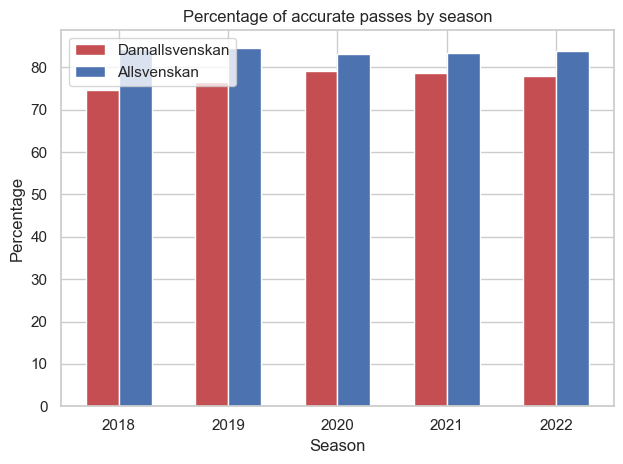

In [63]:
# Count the number of accurate passes and inaccurate passes for all teams for each season

pass_count_damallsvenskan2018 = damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2018 = allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan2018 =  damallsvenskan2018_df[damallsvenskan2018_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan2018 = allsvenskan2018_df[allsvenskan2018_df['action'] == 'Pass accurate'].shape[0]

pass_count_damallsvenskan2019 = damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2019 = allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan2019 =  damallsvenskan2019_df[damallsvenskan2019_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan2019 = allsvenskan2019_df[allsvenskan2019_df['action'] == 'Pass accurate'].shape[0]

pass_count_damallsvenskan2020 = damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2020 = allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan2020 =  damallsvenskan2020_df[damallsvenskan2020_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan2020 = allsvenskan2020_df[allsvenskan2020_df['action'] == 'Pass accurate'].shape[0]

pass_count_damallsvenskan2021 = damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2021 = allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan2021 =  damallsvenskan2021_df[damallsvenskan2021_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan2021 = allsvenskan2021_df[allsvenskan2021_df['action'] == 'Pass accurate'].shape[0]

pass_count_damallsvenskan2022 = damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]
pass_count_allsvenskan2022 = allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass accurate'].shape[0] + allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass inaccurate'].shape[0]
acc_pass_count_damallsvenskan2022 =  damallsvenskan2022_df[damallsvenskan2022_df['action'] == 'Pass accurate'].shape[0]
acc_pass_count_allsvenskan2022 = allsvenskan2022_df[allsvenskan2022_df['action'] == 'Pass accurate'].shape[0]

# Calculate the percentage for each season
percentage_damallsvenskan2018 = acc_pass_count_damallsvenskan2018 / pass_count_damallsvenskan2018 * 100
percentage_allsvenskan2018 = acc_pass_count_allsvenskan2018 / pass_count_allsvenskan2018 * 100

percentage_damallsvenskan2019 = acc_pass_count_damallsvenskan2019 / pass_count_damallsvenskan2019 * 100
percentage_allsvenskan2019 = acc_pass_count_allsvenskan2019 / pass_count_allsvenskan2019 * 100

percentage_damallsvenskan2020 = acc_pass_count_damallsvenskan2020 / pass_count_damallsvenskan2020 * 100
percentage_allsvenskan2020 = acc_pass_count_allsvenskan2020 / pass_count_allsvenskan2020 * 100

percentage_damallsvenskan2021 = acc_pass_count_damallsvenskan2021 / pass_count_damallsvenskan2021 * 100
percentage_allsvenskan2021 = acc_pass_count_allsvenskan2021 / pass_count_allsvenskan2021 * 100

percentage_damallsvenskan2022 = acc_pass_count_damallsvenskan2022 / pass_count_damallsvenskan2022 * 100
percentage_allsvenskan2022 = acc_pass_count_allsvenskan2022 / pass_count_allsvenskan2022 * 100

# Data to plot 
n_groups = 5
damallsvenskan = (percentage_damallsvenskan2018, percentage_damallsvenskan2019, percentage_damallsvenskan2020, percentage_damallsvenskan2021, percentage_damallsvenskan2022)
allsvenskan = (percentage_allsvenskan2018, percentage_allsvenskan2019, percentage_allsvenskan2020, percentage_allsvenskan2021, percentage_allsvenskan2022)

# Create plot
sns.set_style("whitegrid")
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1

rects1 = plt.bar(index, damallsvenskan, bar_width,
                alpha=opacity,
                color='r',
                label='Damallsvenskan')

rects2 = plt.bar(index + bar_width, allsvenskan, bar_width,
                alpha=opacity,
                color='b',
                label='Allsvenskan')

plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Percentage of accurate passes by season')
plt.xticks(index + bar_width / 2, ('2018', '2019', '2020', '2021', '2022'))  # Adjusted here
plt.legend()
plt.tight_layout()
plt.show()

### Goal conversion rate

In [64]:
# Count the number of shots in total for all teams for each season
shot_count_damallsvenskan =  damallsvenskan_all_df[damallsvenskan_all_df['action'] == 'Shot'].shape[0]
# Count all the times that a row has the event 'Shot' and the row beneath it has the event 'Goal'
goal_count_damallsvenskan = 0
for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        goal_count_damallsvenskan += 1
# Goal conversion rate
goal_conversion_rate_damallsvenskan = goal_count_damallsvenskan / shot_count_damallsvenskan * 100

# Same with Allsvenskan
shot_count_allsvenskan = allsvenskan_all_df[allsvenskan_all_df['action'] == 'Shot'].shape[0]
goal_count_allsvenskan = 0
for i in range(len(allsvenskan_all_df) - 1):
    if allsvenskan_all_df.iloc[i]['action'] == 'Shot' and allsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        goal_count_allsvenskan += 1
goal_conversion_rate_allsvenskan = goal_count_allsvenskan / shot_count_allsvenskan * 100

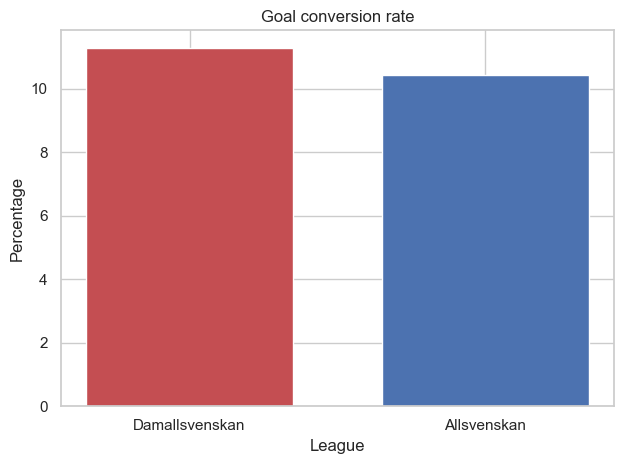

In [65]:
# Plot the data
sns.set_style("whitegrid")
fig, ax = plt.subplots()
index = np.array([0, 1])
bar_width = 0.7
opacity = 1

rects1 = plt.bar(index[0], goal_conversion_rate_damallsvenskan, bar_width,
                alpha=opacity,
                color='r',
                label='Damallsvenskan')

rects2 = plt.bar(index[1], goal_conversion_rate_allsvenskan, bar_width,
                alpha=opacity,
                color='b',
                label='Allsvenskan')

plt.xlabel('League')
plt.ylabel('Percentage')
plt.title('Goal conversion rate')
plt.xticks(index, ('Damallsvenskan', 'Allsvenskan'))
plt.tight_layout()
plt.show()

### Goal Placement

In [71]:
# For every shot on target, there is a coordinate to where the shot hit the goal.
# I want to count the number of shots that hit the goal in each of the 9 zones of the goal.
# After that i want to calcuate the percentage of the shots for each zone that was a goal.

shot_placement_dict = {'zone1': 0, 'zone2': 0, 'zone3': 0, 'zone4': 0, 'zone5': 0, 'zone6': 0, 'zone7': 0, 'zone8': 0, 'zone9': 0}

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] != 'Goal':
        if damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Left':
            shot_placement_dict['zone1'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Center':
            shot_placement_dict['zone2'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Right':
            shot_placement_dict['zone3'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Left':
            shot_placement_dict['zone4'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Center':
            shot_placement_dict['zone5'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Right':
            shot_placement_dict['zone6'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Left':
            shot_placement_dict['zone7'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Center':
            shot_placement_dict['zone8'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Right':
            shot_placement_dict['zone9'] += 1

goal_shot_placement = {'zone1': 0, 'zone2': 0, 'zone3': 0, 'zone4': 0, 'zone5': 0, 'zone6': 0, 'zone7': 0, 'zone8': 0, 'zone9': 0}

for i in range(len(damallsvenskan_all_df) - 1):
    if damallsvenskan_all_df.iloc[i]['action'] == 'Shot' and damallsvenskan_all_df.iloc[i+1]['action'] == 'Goal':
        if damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Left':
            goal_shot_placement['zone1'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Center':
            goal_shot_placement['zone2'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Top-Right':
            goal_shot_placement['zone3'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Left':
            goal_shot_placement['zone4'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Center':
            goal_shot_placement['zone5'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Mid-Right':
            goal_shot_placement['zone6'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Left':
            goal_shot_placement['zone7'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Center':
            goal_shot_placement['zone8'] += 1
        elif damallsvenskan_all_df.iloc[i+1]['goal_mouth'] == 'Bottom-Right':
            goal_shot_placement['zone9'] += 1

# Calculate the percentage of goals for each zone
goal_percentage_zone1 = goal_shot_placement['zone1'] / (shot_placement_dict['zone1'] + goal_shot_placement['zone1']) * 100
goal_percentage_zone2 = goal_shot_placement['zone2'] / (shot_placement_dict['zone2'] + goal_shot_placement['zone2']) * 100
goal_percentage_zone3 = goal_shot_placement['zone3'] / (shot_placement_dict['zone3'] + goal_shot_placement['zone3']) * 100
goal_percentage_zone4 = goal_shot_placement['zone4'] / (shot_placement_dict['zone4'] + goal_shot_placement['zone4']) * 100
goal_percentage_zone5 = goal_shot_placement['zone5'] / (shot_placement_dict['zone5'] + goal_shot_placement['zone5']) * 100
goal_percentage_zone6 = goal_shot_placement['zone6'] / (shot_placement_dict['zone6'] + goal_shot_placement['zone6']) * 100
goal_percentage_zone7 = goal_shot_placement['zone7'] / (shot_placement_dict['zone7'] + goal_shot_placement['zone7']) * 100
goal_percentage_zone8 = goal_shot_placement['zone8'] / (shot_placement_dict['zone8'] + goal_shot_placement['zone8']) * 100
goal_percentage_zone9 = goal_shot_placement['zone9'] / (shot_placement_dict['zone9'] + goal_shot_placement['zone9']) * 100

# Data to plot
n_groups = 9
damallsvenskan = (goal_percentage_zone1, goal_percentage_zone2, goal_percentage_zone3, goal_percentage_zone4, goal_percentage_zone5, goal_percentage_zone6, goal_percentage_zone7, goal_percentage_zone8, goal_percentage_zone9)


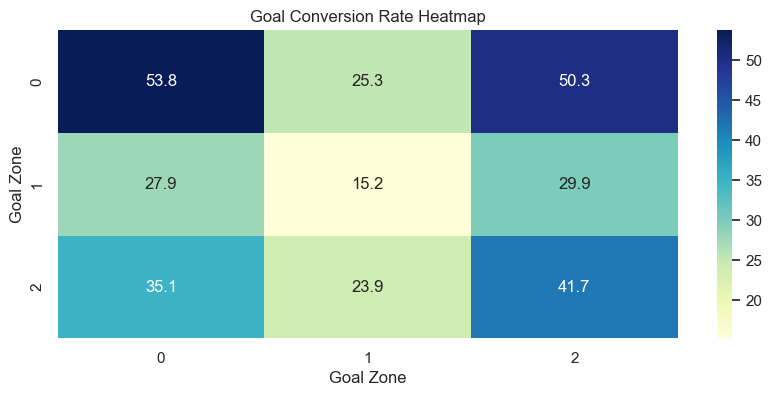

In [77]:
# Create a new figure with a 16:9 aspect ratio
plt.figure(figsize=(10, 4))

# Create plot
heatmap_data = np.array(damallsvenskan).reshape(3, 3)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu')

# Set the labels
plt.xlabel('Goal Zone')
plt.ylabel('Goal Zone')
plt.title('Goal Conversion Rate Heatmap')

plt.show()

### Possession